In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [7]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [10]:
#Drop duolicated rows
data1.drop_duplicates(keep='first',inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [11]:
data1.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

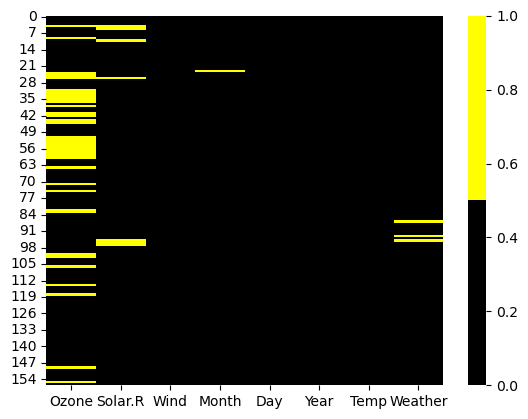

In [12]:
cols = data1.columns
colors = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [13]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ",median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [14]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [15]:
median_Solar = data1["Solar.R"].median()
mean_Solar = data1["Solar.R"].mean()
print("Median of Solar: ",median_Solar)
print("Mean of Solar: ",mean_Solar)

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


In [16]:
data1['Solar.R'] = data1['Solar.R'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [19]:
data.head()


,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [20]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [22]:
data1['Weather'] = data1['Weather'].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [24]:
print(data1["Month"].value_counts())
mode_month = data1["Month"].mode()[0]
print(mode_month)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [25]:
data1['Month'] = data1['Month'].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [27]:
data.tail()


,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [31]:
data1.reset_index(drop=True)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,31.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


In [34]:
#Detection of outlier in the Columns

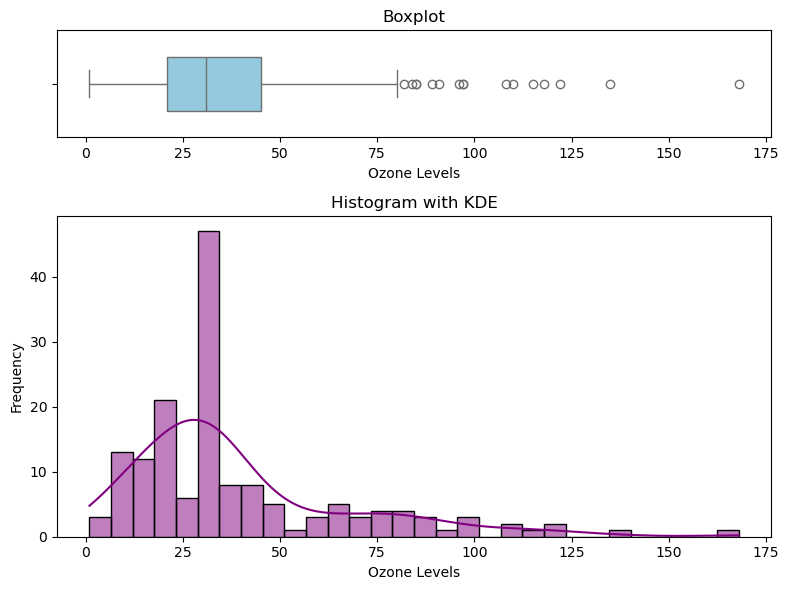

In [36]:

#create a figure with two subplots, stacked verticall
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


####observation
- The ozone columns has extreme values beyond 81 as seen from box plot
- The same is confirmed from the below the right=skewed histogram

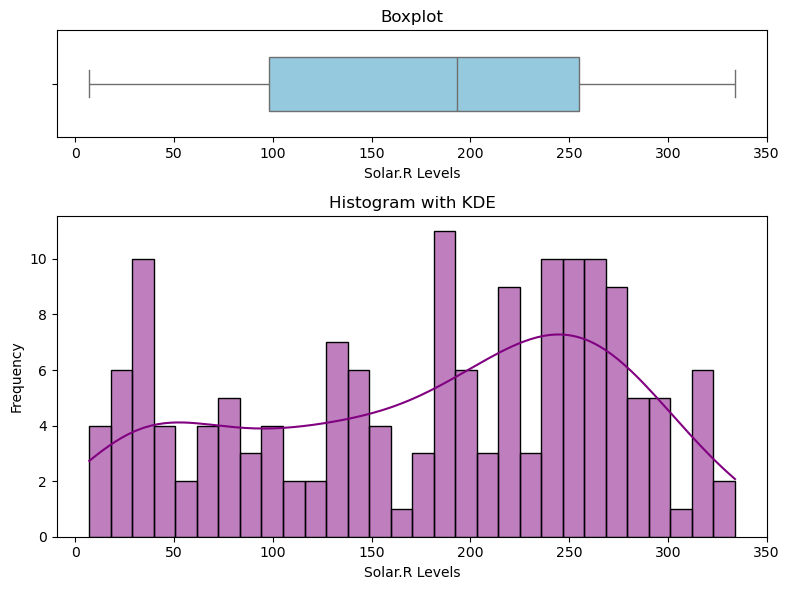

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data1["Solar.R"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar.R Levels")

sns.histplot(data1["Solar.R"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar.R Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

####Observation
- No Outlier
- It not symmetric

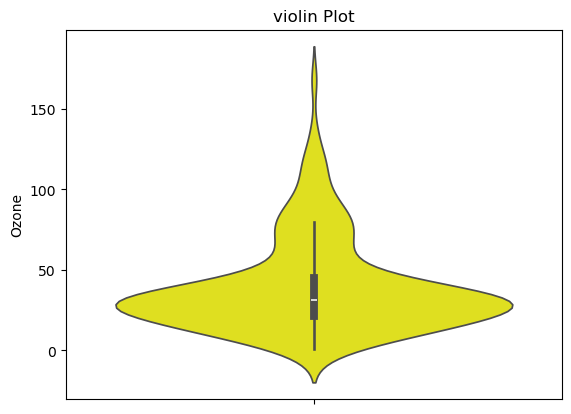

In [40]:
# create a figure for violin plot
sns.violinplot(data=data1["Ozone"], color='yellow')
plt.title("violin Plot")
plt.show()

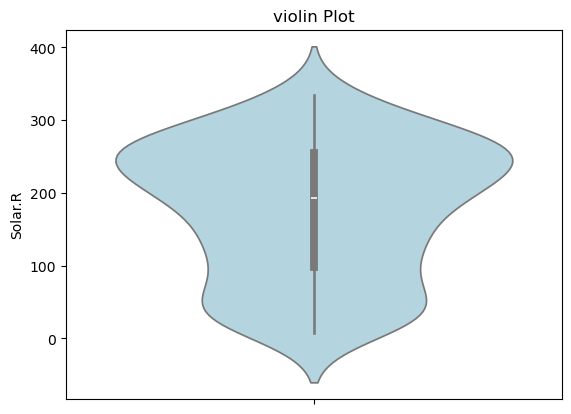

In [41]:
sns.violinplot(data=data1["Solar.R"], color='lightblue')
plt.title("violin Plot")
plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

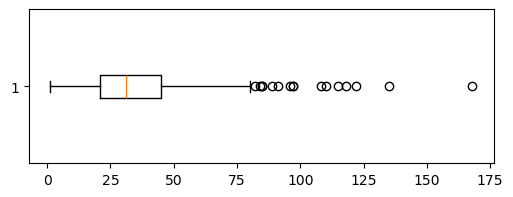

In [42]:
plt.figure(figsize=(6, 2))
boxplot_data = plt.boxplot(data1["Ozone"],vert = False)
[item.get_xdata() for item in boxplot_data['fliers']]

[array([], dtype=float64)]

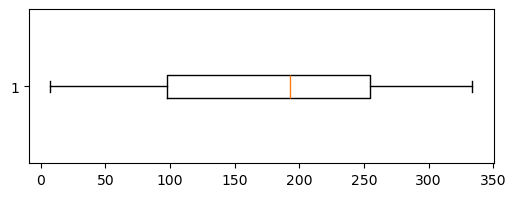

In [43]:
plt.figure(figsize=(6, 2))
boxplot_data = plt.boxplot(data1["Solar.R"],vert = False)
[item.get_xdata() for item in boxplot_data['fliers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2486be8f560>,
 'caps': [<matplotlib.lines.Line2D at 0x2486be8fad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2486be8f290>],
 'medians': [<matplotlib.lines.Line2D at 0x2486c6300e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2486c6303e0>],
 'means': []}

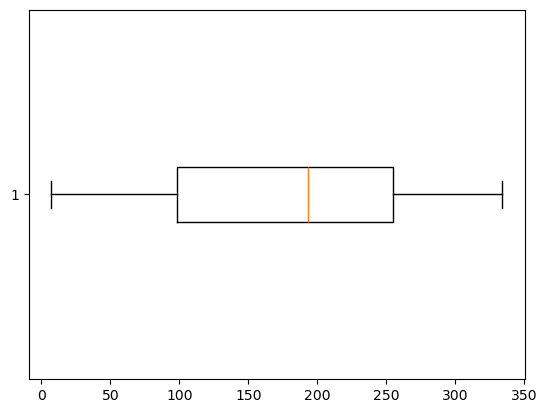

In [44]:
plt.boxplot(data1["Solar.R"],vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2486c66a4b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2486c66a9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2486c632b10>],
 'medians': [<matplotlib.lines.Line2D at 0x2486c66aea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2486c66b140>],
 'means': []}

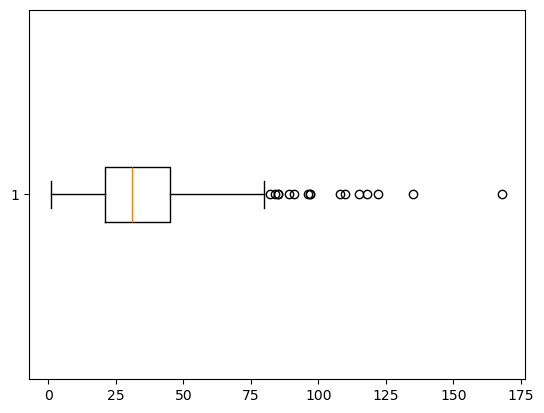

In [45]:
plt.boxplot(data1["Ozone"],vert = False)

METHOD-2
-Using mu +/-3*sigma limits

In [47]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [48]:
data1["Solar.R"].describe()

count    157.000000
mean     178.484076
std       92.684439
min        7.000000
25%       98.000000
50%      193.000000
75%      255.000000
max      334.000000
Name: Solar.R, dtype: float64

In [49]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
         print(x)

135.0
168.0


C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3559441634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3559441634.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Quantile-Quantile plot for Detection of Outlier

Text(0.5, 0, 'Theoretical Quantiles')

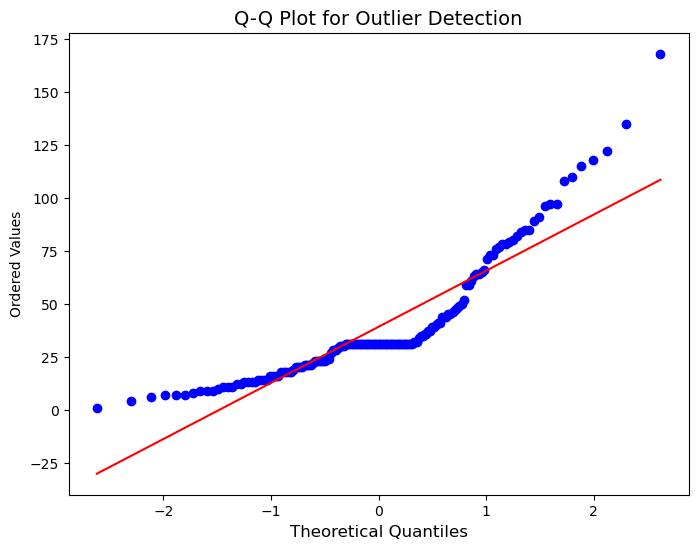

In [51]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

Text(0.5, 0, 'Theoretical Quantiles')

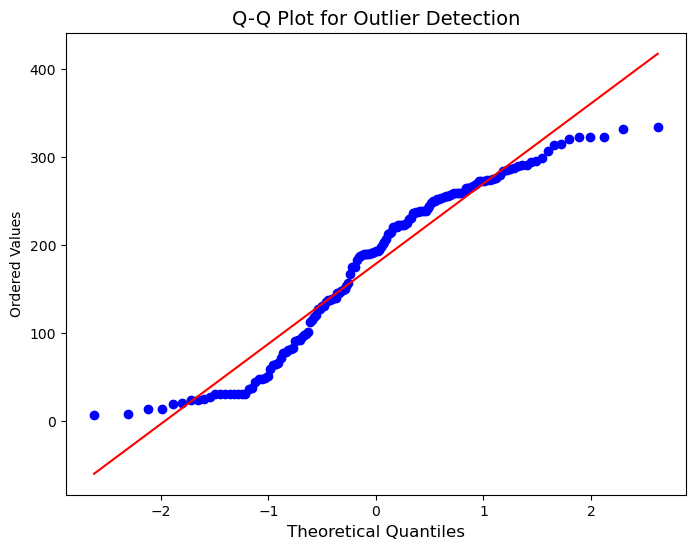

In [52]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Solar.R"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\1263142871.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

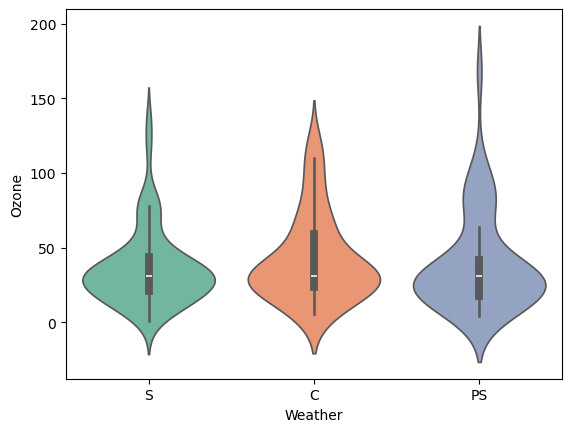

In [56]:
sns.violinplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2")

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3278299978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

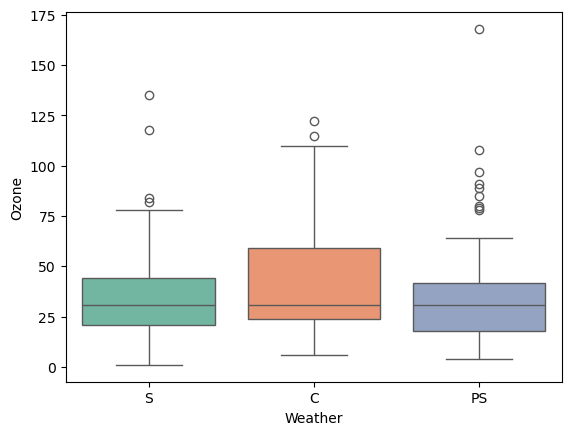

In [58]:
sns.boxplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2")

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\709175022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

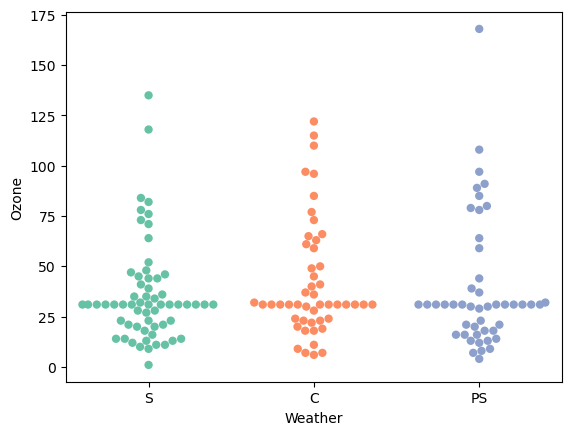

In [60]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone", palette = "Set2", size=6)

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3757487137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2")


<Axes: xlabel='Weather', ylabel='Solar.R'>

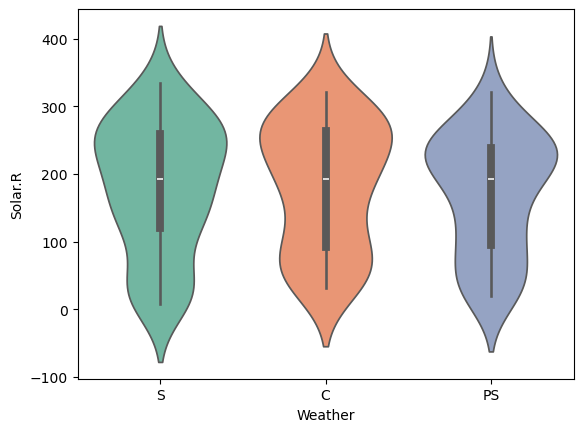

In [61]:
sns.violinplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2")

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\1663078414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2")


<Axes: xlabel='Weather', ylabel='Solar.R'>

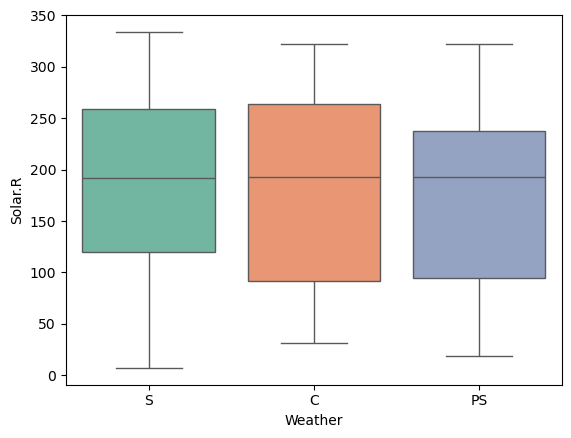

In [62]:
sns.boxplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2")

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3059490049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2", size=6)


<Axes: xlabel='Weather', ylabel='Solar.R'>

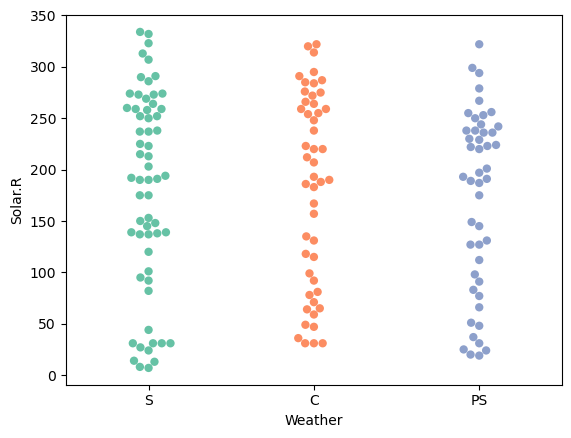

In [63]:
sns.swarmplot(data=data1, x = "Weather", y = "Solar.R", palette = "Set2", size=6)

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\3811808682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone", color="orange", palette = "Set1", size=6, jitter = True)


<Axes: xlabel='Weather', ylabel='Ozone'>

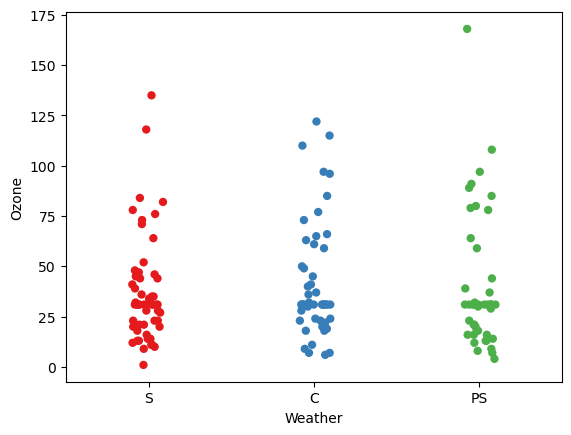

In [65]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone", color="orange", palette = "Set1", size=6, jitter = True)

C:\Users\barig\AppData\Local\Temp\ipykernel_3508\166346200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Solar.R", color="orange", palette = "Set1", size=6, jitter = True)


<Axes: xlabel='Weather', ylabel='Solar.R'>

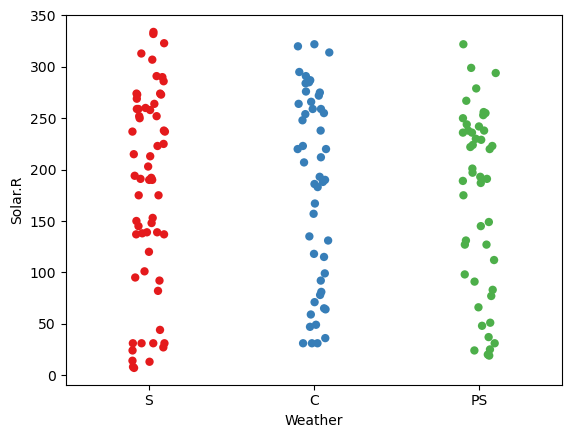

In [67]:
sns.stripplot(data=data1, x = "Weather", y = "Solar.R", color="orange", palette = "Set1", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

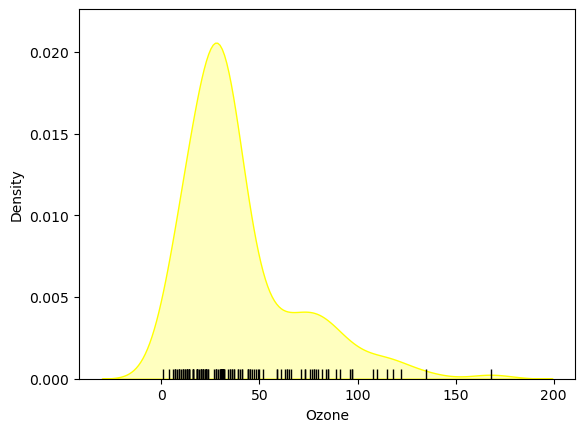

In [68]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="yellow")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Solar.R', ylabel='Density'>

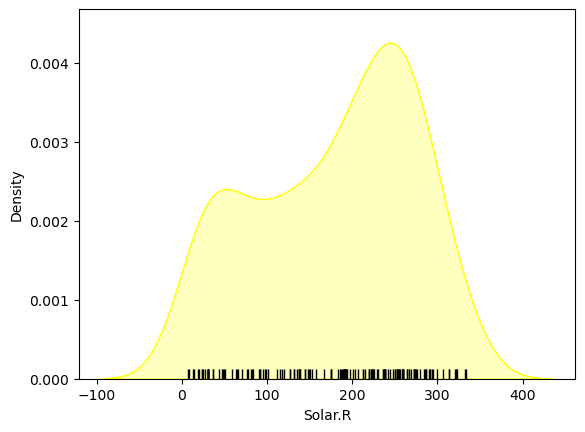

In [70]:
sns.kdeplot(data=data1["Solar.R"], fill=True, color="yellow")
sns.rugplot(data=data1["Solar.R"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

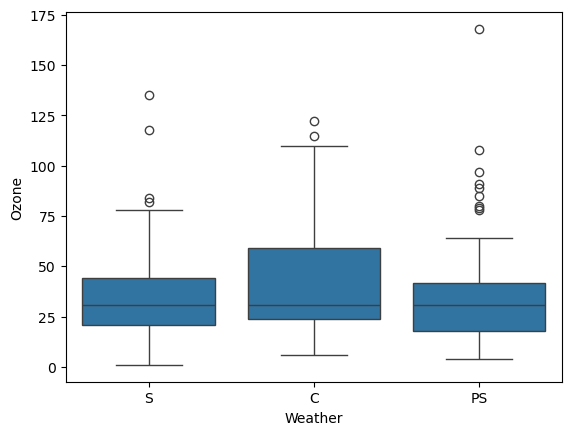

In [71]:
sns.boxplot(data = data1, x = "Weather", y = "Ozone")

<Axes: xlabel='Weather', ylabel='Solar.R'>

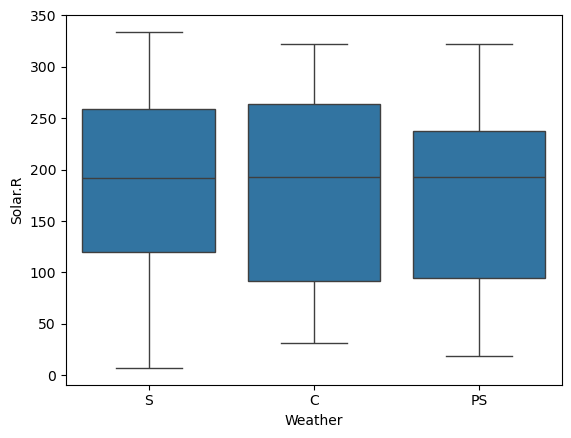

In [73]:
sns.boxplot(data = data1, x = "Weather", y = "Solar.R")

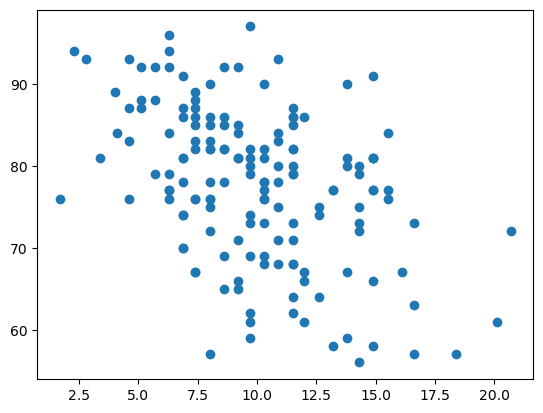

In [85]:
   plt.scatter(data1["Wind"], data1["Temp"])

In [ ]:
data1["Wind"].corr(data1["Temp"])